<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Setup-notebook" data-toc-modified-id="Setup-notebook-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup notebook</a></span></li><li><span><a href="#Import-and-clean-Yellow-Taxi-data" data-toc-modified-id="Import-and-clean-Yellow-Taxi-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import and clean Yellow Taxi data</a></span><ul class="toc-item"><li><span><a href="#Download-the-data-and-move-it-to-PUIData" data-toc-modified-id="Download-the-data-and-move-it-to-PUIData-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Download the data and move it to PUIData</a></span></li><li><span><a href="#Read-in-only-one-observation-every-1,000-observations" data-toc-modified-id="Read-in-only-one-observation-every-1,000-observations-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Read in only one observation every 1,000 observations</a></span></li><li><span><a href="#Drop-unnecessary-columns" data-toc-modified-id="Drop-unnecessary-columns-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Drop unnecessary columns</a></span></li><li><span><a href="#Calculate-trip-duration-and-tip-amount" data-toc-modified-id="Calculate-trip-duration-and-tip-amount-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Calculate trip duration and tip amount</a></span></li><li><span><a href="#Get-Zipcodes" data-toc-modified-id="Get-Zipcodes-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Get Zipcodes</a></span></li></ul></li><li><span><a href="#Import-and-clean-up-zip-code-income-data" data-toc-modified-id="Import-and-clean-up-zip-code-income-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import and clean up zip code income data</a></span></li><li><span><a href="#Aggregate-the-data" data-toc-modified-id="Aggregate-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Aggregate the data</a></span></li><li><span><a href="#Plot-the-distribution-of-tip-percentages-and-describe-its-first-and-second-moment" data-toc-modified-id="Plot-the-distribution-of-tip-percentages-and-describe-its-first-and-second-moment-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Plot the distribution of tip percentages and describe its first and second moment</a></span></li><li><span><a href="#Test-if-the-distribution-is-consistent-with-a-Gaussian" data-toc-modified-id="Test-if-the-distribution-is-consistent-with-a-Gaussian-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test if the distribution is consistent with a Gaussian</a></span></li><li><span><a href="#Fit-a-line-to-taxi-fare-vs-trip-duration-and-to-taxi-fare-vs-trip-distance-to-decide-which-variable-between-duration-and-distance-&quot;contains-more-information&quot;-when-used-with-the-fare" data-toc-modified-id="Fit-a-line-to-taxi-fare-vs-trip-duration-and-to-taxi-fare-vs-trip-distance-to-decide-which-variable-between-duration-and-distance-&quot;contains-more-information&quot;-when-used-with-the-fare-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Fit a line to taxi fare vs trip duration and to taxi fare vs trip distance to decide which variable between duration and distance "contains more information" when used with the fare</a></span></li><li><span><a href="#Remove-outliers-and-assess-if-this-has-an-effect-this-has-on-the-model" data-toc-modified-id="Remove-outliers-and-assess-if-this-has-an-effect-this-has-on-the-model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Remove outliers and assess if this has an effect this has on the model</a></span></li><li><span><a href="#Create-two-multivariate-linear-model-to-predict-the-tip-percentage" data-toc-modified-id="Create-two-multivariate-linear-model-to-predict-the-tip-percentage-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Create two multivariate linear model to predict the tip percentage</a></span></li><li><span><a href="#Compare-multivariate-linear-model-to-predict-the-tip-percentage-and-assess-importance-of-socioeconomic-variables" data-toc-modified-id="Compare-multivariate-linear-model-to-predict-the-tip-percentage-and-assess-importance-of-socioeconomic-variables-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Compare multivariate linear model to predict the tip percentage and assess importance of socioeconomic variables</a></span></li><li><span><a href="#Look-at-this-all-again-with-actual-tips" data-toc-modified-id="Look-at-this-all-again-with-actual-tips-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Look at this all again with actual tips</a></span></li></ul></div>

# PUI2017 Midterm
**NetID:** sac820@nyu.edu

## Setup notebook

In [2]:
from __future__ import print_function, division
import os, shutil
import geopandas as gp
import pandas as pd
import xlrd
from pandas.plotting import scatter_matrix
import numpy as np
import pylab as pl
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import scipy

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Import and clean Yellow Taxi data

### Download the data and move it to PUIData

In [ ]:
os.system("curl -O https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2009-02.csv");
path = os.getcwd()
oldFile = path + "/" + "yellow_tripdata_2009-02.csv"
newFile = os.getenv("PUIDATA") + "yellow-taxi.csv"
shutil.move(oldFile, newFile);

### Read in only one observation every 1,000 observations

In [123]:
taxiData = pd.read_csv(newFile)

In [124]:
taxiData = taxiData[::1000]

In [10]:
# FBB added to speed up while grading
taxiData = pd.read_csv("http://cosmo.nyu.edu/~fb55/data/yc200902_tripdata_trimmed.csv")

# FBB task 1 10/10

### Drop unnecessary columns

In [11]:
keepColumns = ['Trip_Pickup_DateTime', 'Trip_Dropoff_DateTime','Trip_Distance', 
               'Start_Lon', 'Start_Lat', 'End_Lon', 'End_Lat', 'Fare_Amt', 'Tip_Amt']
taxiData = pd.DataFrame(taxiData, columns=keepColumns)
taxiData = taxiData.dropna()

### Calculate trip duration and tip amount

In [12]:
taxiData['Trip_Dropoff_DateTime']  = pd.to_datetime(taxiData['Trip_Dropoff_DateTime'] )
taxiData['Trip_Pickup_DateTime'] = pd.to_datetime(taxiData['Trip_Pickup_DateTime'])
taxiData['Duration'] = taxiData['Trip_Dropoff_DateTime'] - taxiData['Trip_Pickup_DateTime']
taxiData['Tip Percentage'] = (taxiData['Tip_Amt'] / taxiData['Fare_Amt']) * 100

# FBB task 3 10/10 although I want to see the duration column in action 

### Get Zipcodes

In [13]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/data/departureZIP.csv");
path = os.getcwd()
oldFile = path + "/" + "departureZIP.csv"
newFile = os.getenv("PUIDATA") + "departureZIP.csv"
shutil.move(oldFile, newFile);
departureZIP = pd.read_csv(newFile)

In [14]:
os.system("curl -O http://cosmo.nyu.edu/~fb55/data/destinationZIP.csv");
path = os.getcwd()
oldFile = path + "/" + "destinationZIP.csv"
newFile = os.getenv("PUIDATA") + "destinationZIP.csv"
shutil.move(oldFile, newFile);
destinationZIP = pd.read_csv(newFile)

In [15]:
keepColumns = ['Start_Lon', 'Start_Lat','ZIPCODE']
departureZIP = pd.DataFrame(departureZIP, columns=keepColumns)

In [16]:
keepColumns = ['End_Lon', 'End_Lat','ZIPCODE']
destinationZIP = pd.DataFrame(destinationZIP, columns=keepColumns)

In [17]:
taxiData = taxiData.merge(departureZIP, on=['Start_Lon', 'Start_Lat'])
taxiData = taxiData.merge(destinationZIP, on=['End_Lon', 'End_Lat'])

In [18]:
keepColumns = ['Trip_Distance', 'Fare_Amt','Tip_Amt', 'Duration', 'Tip Percentage', 'ZIPCODE_x', 
               'ZIPCODE_y']
taxiData = pd.DataFrame(taxiData, columns=keepColumns)
taxiData = taxiData.dropna()

In [19]:
taxiData.columns = ['Trip Distance', 'Fare', 'Tip', 'Duration', 'Tip Percent', 'Departure', 'Destination']

# FBB task 4 10/10

# FBB show the reader your notebook at intermediate steps, treat this as a presentation

## Import and clean up zip code income data

In [20]:
os.system("curl -O http://www.nber.org/tax-stats/zipcode/2009/09zp33ny.xls");
path = os.getcwd()
oldFile = path + "/" + "09zp33ny.xls"
newFile = os.getenv("PUIDATA") + "income-data.xls"
shutil.move(oldFile, newFile);

In [21]:
incomeData = pd.read_excel(newFile, header=3, index_col="ZIP\ncode [1]")

In [22]:
keepColumns = ['Number of returns', 'Number of joint returns','Number of dependents', 
               'Adjusted gross income (AGI)']
incomeData = pd.DataFrame(incomeData, columns=keepColumns)
incomeData = incomeData.dropna()

In [23]:
incomeData['Population'] = incomeData['Number of returns'] + incomeData['Number of joint returns'] + incomeData['Number of dependents']
incomeData['Income Per Capita'] = incomeData['Adjusted gross income (AGI)'] / incomeData['Population']

In [24]:
keepColumns = ['Population', 'Income Per Capita']
incomeData = pd.DataFrame(incomeData, columns=keepColumns)
incomeData = incomeData.dropna()
incomeData.reset_index

<bound method DataFrame.reset_index of                Population  Income Per Capita
ZIP\ncode [1]                               
NaN                    -8           0.750000
 0               17016108          34.735223
 0                5603417           7.558131
 0                3804900          20.144112
 0                2407018          30.532293
 0                1721106          37.097494
 0                2550480          50.158381
 0                 929187         222.551718
 10001              17426          94.386319
 10001               5594           8.757240
 10001               3497          27.260223
 10001               2346          46.324382
 10001               1513          63.407799
 10001               2286          93.640857
 10001               2190         493.964840
 10002              77558          21.312824
 10002              47007           6.060991
 10002              15439          20.130060
 10002               6236          38.303239
 10002          

# FBB broken cell: there is a nan index at index 0 which prevents conversion to int

In [25]:
incomeData = incomeData[1:]

In [26]:
incomeData['ZIP Code'] = incomeData.index.astype(float)
incomeData['ZIP Code'] = incomeData.index.astype(int)

/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/fbianco/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [27]:
incomeData = incomeData.dropna()

In [28]:
incomeData = incomeData[::7]

# FBB ok task 2 10/10

## Aggregate the data

Data aggregation task: Join the datasets so that your data contains at least: trip duration, trip distance, fare amount, tip percentage, departure zipcode income, and destination zipcode income¶

In [29]:
taxiData.head()

,Trip Distance,Fare,Tip,Duration,Tip Percent,Departure,Destination
0,1.60,6.9,0.00,00:08:39,0.000000,10036,10011
1,11.95,28.5,0.00,00:26:00,0.000000,10022,11218
2,2.86,9.3,0.00,00:10:00,0.000000,10003,10018
3,4.60,14.9,2.00,00:20:00,13.422819,10002,10128
4,2.40,9.3,1.39,00:11:52,14.946237,10016,10002


In [30]:
incomeData.head()

,Population,Income Per Capita,ZIP Code
ZIP code [1],,,
0,17016108,34.735223,0
10001,17426,94.386319,10001
10002,77558,21.312824,10002
10003,38156,119.356720,10003
10004,3231,150.291551,10004


In [31]:
data1 = taxiData.merge(incomeData, left_on='Departure', right_on='ZIP Code')
data1=data1.rename(columns = {'Income Per Capita':'Departure Income'})

trip duration, trip distance, fare amount, tip percentage, departure zipcode income, and destination zipcode income¶

In [32]:
data2 = taxiData.merge(incomeData, left_on='Destination', right_on='ZIP Code')
data2=data2.rename(columns = {'Income Per Capita':'Destination Income'})

In [33]:
data = data1
data['Destination Income'] = data2['Destination Income']

In [34]:
keepColumns = ['Trip Distance', 'Duration', 'Fare', 'Tip Percent', 'Departure Income', 'Destination Income']
data = pd.DataFrame(data, columns=keepColumns)
data = data.dropna()

# FBB it would be really helpful if you rendered your dataframes at intermediate steps! I think you have it right so far part 1 50/50 

In [36]:
data.head(50)

,Trip Distance,Duration,Fare,Tip Percent,Departure Income,Destination Income
0,1.60,00:08:39,6.9,0.000000,120.643519,121.765217
1,1.01,00:07:00,5.7,0.000000,120.643519,121.765217
2,1.16,00:09:00,6.1,0.000000,120.643519,121.765217
3,0.80,00:07:00,5.7,0.000000,120.643519,121.765217
4,0.80,00:07:00,5.7,0.000000,120.643519,121.765217
5,2.60,00:10:59,8.9,24.943820,120.643519,121.765217
6,6.09,00:23:00,20.5,0.000000,120.643519,121.765217
7,1.70,00:11:58,6.9,0.000000,120.643519,121.765217
8,5.50,00:16:52,16.2,0.000000,120.643519,121.765217
9,0.90,00:04:14,4.9,0.000000,120.643519,121.765217


## Plot the distribution of tip percentages and describe its first and second moment

In [37]:
pl.hist(data['Tip Percent'], 100, (0,30));
title("Histogram of Tip Percentage Distribution");
xlabel("Tip Percentage");
ylabel("Frequency");

NameError: name 'pl' is not defined

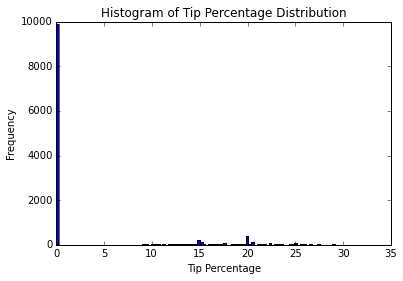

In [37]:
# FBB missing pylab import
import pylab as pl
pl.hist(data['Tip Percent'], 100, (0,30));
title("Histogram of Tip Percentage Distribution");
xlabel("Tip Percentage");
ylabel("Frequency");

# FBB missing caption -3

In [ ]:
#moment 1 is the mean
mean = mean(data['Tip Percent'])
print('The mean of the distribution of tip percentage is: ', mean)

In [ ]:
#moment 2 is the variance
variance = sqrt(std(data['Tip Percent']))
print('The mean of the distribution of tip percentage is: ', variance)

# FBB missing caption in figure, missing description of the fact that you trimmed the x range. taht is important especially since I specifically ask to discuss outliers!
# FBB task 6 5/10

## Test if the distribution is consistent with a Gaussian

In [38]:
#Create a Gaussian distribution with which to compare
np.random.seed(100)
gaussDistribution = np.random.normal(0, 1, 100)

NameError: name 'np' is not defined

In [38]:
#FBB did not import numpy
import numpy as np
np.random.seed(100)
gaussDistribution = np.random.normal(0, 1, 100)

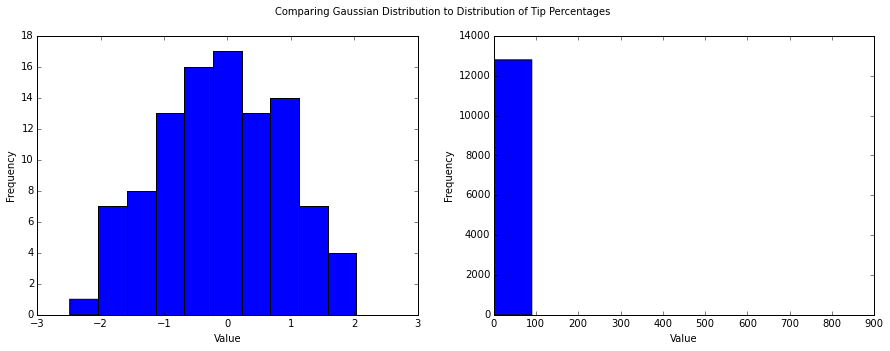

In [39]:
fig = pl.figure(figsize=(15,5))
fig.suptitle('Comparing Gaussian Distribution to Distribution of Tip Percentages')

ax1 = fig.add_subplot(121)
ax1.hist(gaussDistribution)
ax1.set_xlabel("Value")
ax1.set_ylabel("Frequency")
ax1.set_ylim()

ax2 = fig.add_subplot(122)
ax2.hist(data['Tip Percent'])
ax2.set_xlabel("Value")
ax2.set_ylabel("Frequency")
ax2.set_ylim()
pl.show()

**Figure 1:** These don't look very similar...

# FBB not a caption. Now your x axis is "value" which is not descriptive

In [39]:
scipy.stats.kstest(data['Tip Percent'], "norm")

NameError: name 'scipy' is not defined

# FBB right test but used incorrectly. for the KS test data has to be standardized:
scipy.stats.kstest((data['Tip Percent'] - data['Tip Percent'].mean()) / data['Tip Percent'].std(), "norm")

# FBB if 0 tips were removed this may look more gaussian $0 tips are tips not recorded for tax purposes

**Interpretation:** With a p-value of zero, we have to reject the null that these two distributions are identical. Thus we can say that the distribution of tips is not Gaussian.

# FBB task 7 5/10 (test used wrong but interpreted right)

## Fit a line to taxi fare vs trip duration and to taxi fare vs trip distance to decide which variable between duration and distance "contains more information" when used with the fare

In [40]:
#We have to turn a time type into a float
duration = pd.DataFrame(data['Duration']).apply(np.float32)
X = sm.add_constant(duration)
durationModel = sm.OLS(endog=data['Fare'], exog=X).fit()

NameError: name 'np' is not defined

In [ ]:
X = sm.add_constant(data['Trip Distance'])
distanceModel = sm.OLS(endog=data['Fare'], exog=X).fit()

In [ ]:
durationModel.summary()

In [ ]:
distanceModel.summary()

**Interpretation:** The distance model has a better R squared value but logically in my mind, I think duration is more important as distances are usually pretty small no matter what in NYC. It's the traffic that matters...

In [41]:
durationValues = durationModel.fittedvalues
distanceValues = distanceModel.fittedvalues

NameError: name 'durationModel' is not defined

In [ ]:
pl.plot(data['Trip Distance'], distanceValues, '-', label='Distance Fit')
pl.plot(data['Duration'], durationValues, '-', label='Duration Fit')
pl.plot(data['Trip Distance'], data['Fare'], '.')
pl.plot(data['Duration'], data['Fare'], '.')
ax.set_xlabel("Duration or Distance of Trip")
ax.set_ylabel("Fare of Trip")
pl.legend()
pl.show()

**Figure 2:** It does look like distance explains more than duration as its points are all along that line. But still this does not make sense as in NYC, distance in actual miles is not that much but it is time that really takes its toll in terms of fares. 

## Remove outliers and assess if this has an effect this has on the model

In [42]:
print(data.describe())

       Trip Distance                Duration          Fare   Tip Percent  \
count   12799.000000                   12799  12799.000000  12799.000000   
mean        2.494942  0 days 00:11:09.371279      9.357508      4.864673   
std         2.753426  0 days 00:15:34.228584      6.503903     15.023289   
min         0.000000       -1 days +23:04:00      2.500000      0.000000   
25%         1.000000         0 days 00:05:54      5.700000      0.000000   
50%         1.620000         0 days 00:09:00      7.500000      0.000000   
75%         2.900000         0 days 00:14:00     10.700000      0.000000   
max        31.430000         0 days 23:59:00     68.900000    900.000000   

       Departure Income  Destination Income  
count      12799.000000        12799.000000  
mean         142.057856          137.696827  
std           66.271410           69.467379  
min            6.793243            6.655770  
25%          111.452011          101.184332  
50%          136.763861          121.76

**Interpretation:** We can see that there is a massive amount of no tips! It then zooms up to 233%! This 233% is definitely an outlier! (Who gives that high of a tip?! You made outta money or something?!) Let's drop tip percents that are above 50%. There's also an odd negative time. Not sure how that happened but let's fix that. And there's a 6 hour trip! Oh god. That's awful. Let's get rid of that too. Oh and that 20 miles...That's too high too!

# FBB good, one of the few notebook that shared the rational for the outliers. However, you never told me what that did to the data? what are the new stats? new mean for tip? turns out its just about 20%!

# FBB yes!

In [43]:
#Our duration is in an annoying deltatime dtype and I don't have enough time to figure out
#how to change this cause I've never used this before so I'm gonna
#Coerce it and it turns it into nanoseconds so I divide them by how many
#nanoseconds are in an hour to get a rough approximation of an hour
data['Duration'] = pd.to_numeric(data['Duration'], errors='coerce')
data['Duration'] = data['Duration'] / 3.6e+12

# FBB good enough 

In [44]:
newData = data[data['Tip Percent'] < 50]
newData = newData[newData['Duration'] > 0]
newData = newData[newData['Duration'] < .23]
newData = newData[newData['Trip Distance'] < 5]

In [45]:
X = sm.add_constant(newData['Duration'])
durationModel = sm.OLS(endog=newData['Fare'], exog=X).fit()

NameError: name 'sm' is not defined

In [ ]:
durationModel.summary()

In [ ]:
X = sm.add_constant(newData['Trip Distance'])
distanceModel = sm.OLS(endog=newData['Fare'], exog=X).fit()

In [ ]:
distanceModel.summary()

In [ ]:
durationValues = durationModel.fittedvalues

fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(111)

pl.plot(newData['Duration'], durationValues, '-', label='Duration Fit')
pl.plot(newData['Duration'], newData['Fare'], '.')
ax.set_xlabel("Duration of Trip")
ax.set_ylabel("Fare of Trip")
pl.legend()
pl.show()

In [ ]:
distanceValues = distanceModel.fittedvalues

fig = pl.figure(figsize=(15,5)) 
ax = fig.add_subplot(111)

pl.plot(newData['Trip Distance'], distanceValues, '-', label='Duration Fit')
pl.plot(newData['Trip Distance'], newData['Fare'], '.')
ax.set_xlabel("Distance of Trip")
ax.set_ylabel("Fare of Trip")
pl.legend()
pl.show()

**Figure 3:** Well look at that! As the distance goes higher, there are fewer points compared to duration. Yet, distance still has a better R-squared. But it still makes more sense for duration.

# FBB good observation in p- but the answer to my question, which should be used, is confusing at best

## Create two multivariate linear model to predict the tip percentage

In [46]:
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Destination Income'], 'x2':newData['Departure Income']})
multivariateModel_1 = smf.ols('y ~ x1 + x2', data=df).fit()
multivariateModel_1.summary()

NameError: name 'smf' is not defined

# FBB you did not import smf (or you removed the import in the final version)

In [51]:
import statsmodels.formula.api as smf
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Destination Income'], 'x2':newData['Departure Income']})
multivariateModel_1 = smf.ols('y ~ x1 + x2', data=df).fit()
multivariateModel_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.114
Date:                Tue, 31 Oct 2017   Prob (F-statistic):            0.00222
Time:                        22:25:53   Log-Likelihood:                -33056.
No. Observations:                9097   AIC:                         6.612e+04
Df Residuals:                    9094   BIC:                         6.614e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.1769      0.318     13.143      0.000         3.554     4.800
x1             0.0036      0.001      2.567      0.010         0.001     0.006
x2            -0.0033      0.002     -2.172      0.030        -0.006    -0.000
==============================================================================
Omnibus:                     3782.404   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13320.264
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                       7.049   Cond. No.                         693.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Trip Distance'], 'x2':newData['Duration']})
multivariateMode_2 = smf.ols('y ~ x1 + x2', data=df).fit()
multivariateMode_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     32.33
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           1.02e-14
Time:                        22:25:56   Log-Likelihood:                -33030.
No. Observations:                9097   AIC:                         6.607e+04
Df Residuals:                    9094   BIC:                         6.609e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.7453      0.240     11.428      0.000         2.274     3.216
x1             0.7820      0.152      5.138      0.000         0.484     1.080
x2             2.6248      2.437      1.077      0.282        -2.153     7.402
==============================================================================
Omnibus:                     3863.747   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14250.935
Skew:                           2.192   Prob(JB):                         0.00
Kurtosis:                       7.287   Cond. No.                         48.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Destination Income'], 'x2':newData['Departure Income'],
                  'x3':newData['Trip Distance'], 'x4':newData['Duration']})
multivariateModel_3 = smf.ols('y ~ x1 + x2 + x3 + x4', data=df).fit()
multivariateModel_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     18.73
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           2.39e-15
Time:                        22:25:57   Log-Likelihood:                -33025.
No. Observations:                9097   AIC:                         6.606e+04
Df Residuals:                    9092   BIC:                         6.610e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.6674      0.387      6.897      0.000         1.909     3.426
x1             0.0035      0.001      2.496      0.013         0.001     0.006
x2            -0.0027      0.002     -1.798      0.072        -0.006     0.000
x3             0.7659      0.152      5.026      0.000         0.467     1.065
x4             2.6714      2.437      1.096      0.273        -2.106     7.449
==============================================================================
Omnibus:                     3848.035   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14104.918
Skew:                           2.185   Prob(JB):                         0.00
Kurtosis:                       7.257   Cond. No.                     5.34e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Compare multivariate linear model to predict the tip percentage and assess importance of socioeconomic variables

**Interpretation:** If we regressed all of the variables, the coefficients for the departure and destination zipcode per capita income are low!! They also have high p-values! So, just because you're poor or you're rich doesn't mean you're gonna be stingy with tips!!!! (Actually, since most people don't give tips, I think that's actually what's driving all this.) But duration has the highest coefficient, though an awfully high p-value. Which leaves us with the positive and significant coefficient for distance. Which makes sense in that if you're gonna go to JFK or LaGaurdia, you're probably gonna give a tip. Maybe you're a businessperson on the way to take a flight and your company will pay for the fare and tip.

But let us look at the two different multivariate OLS regressions. The one that is trip duration and distance has a higher R-squared value than the one using area incomes as variables. So we can see that this is perhaps a model that explains more of the data. Then let us look at each coefficient's p-value. For trip duration and distance, duration has such a high p-value that this coefficient is not significant. But distance has a zero p-value! When we look at origin and destination incomes, destination is above 0.05 and origin is almost at 0.05. Thus we cannot really consider these coefficients as significant explainers of tip percentage variation.

One of the real problems here is that there really is no variation in our data. That is there is hardly any distribution. Almost everyone doesn't tip! (Honestly, I've never tipped in a cab...I didn't know you were supposed to and now I feel really bad. Are we supposed to? UGH. Can America just get rid of tipping and just pay people - you know - a living wage? It would do a lot for socioeconomic fairness and also my social anxiety.) Let's do all this if we get rid of zero percentage tips, shall we?

## Look at this all again with actual tips

In [54]:
newerData = data[data['Tip Percent'] > 0]

In [55]:
df = pd.DataFrame({'y':newerData['Tip Percent'], 'x1':newerData['Destination Income'], 'x2':newerData['Departure Income'],
                  'x3':newerData['Trip Distance'], 'x4':newerData['Duration']})
multivariateModel_4 = smf.ols('y ~ x1 + x2 + x3 + x4', data=df).fit()
multivariateModel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     7.066
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           1.17e-05
Time:                        22:26:00   Log-Likelihood:                -13586.
No. Observations:                2926   AIC:                         2.718e+04
Df Residuals:                    2921   BIC:                         2.721e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     24.5995      1.585     15.522      0.000        21.492    27.707
x1            -0.0066      0.007     -0.994      0.320        -0.019     0.006
x2             0.0004      0.007      0.060      0.952        -0.013     0.014
x3            -0.7398      0.156     -4.742      0.000        -1.046    -0.434
x4            -0.9894      1.021     -0.969      0.332        -2.991     1.012
==============================================================================
Omnibus:                     7383.557   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        100071773.949
Skew:                          27.338   Prob(JB):                         0.00
Kurtosis:                     907.340   Cond. No.                         716.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** Well there. The only coefficient that is significant is trip duration. And basically the longer your trip, the less you're gonna tip! Well, that makes sense if you're an impatient New Yorker and a cabbie has decided he thinks you're a tourist that he can take on the longer route.

In [56]:
X = sm.add_constant(newData['Duration'])
durationModel2 = sm.OLS(endog=newData['Fare'], exog=X).fit()
durationModel2.summary()

NameError: name 'sm' is not defined

In [57]:
X = sm.add_constant(newData['Trip Distance'])
distanceModel2 = sm.OLS(endog=newData['Fare'], exog=X).fit()
distanceModel2.summary()

NameError: name 'sm' is not defined

# FBB you also removed the statsmodels import...

In [58]:
df = pd.DataFrame({'y':newerData['Tip Percent'],'x3':newerData['Trip Distance'], 'x4':newerData['Duration']})
multivariateModel_4 = smf.ols('y ~ x3 + x4', data=df).fit()
multivariateModel_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     13.63
Date:                Tue, 31 Oct 2017   Prob (F-statistic):           1.28e-06
Time:                        22:26:02   Log-Likelihood:                -13587.
No. Observations:                2926   AIC:                         2.718e+04
Df Residuals:                    2923   BIC:                         2.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     23.7413      0.663     35.813      0.000        22.441    25.041
x3            -0.7438      0.155     -4.790      0.000        -1.048    -0.439
x4            -0.9545      1.020     -0.936      0.349        -2.954     1.045
==============================================================================
Omnibus:                     7386.180   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        100273974.235
Skew:                          27.362   Prob(JB):                         0.00
Kurtosis:                     908.254   Cond. No.                         9.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
df = pd.DataFrame({'y':newData['Tip Percent'], 'x1':newData['Destination Income'], 'x2':newData['Departure Income'],})
multivariateModel_5 = smf.ols('y ~ x1 + x2', data=df).fit()
multivariateModel_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     6.114
Date:                Tue, 31 Oct 2017   Prob (F-statistic):            0.00222
Time:                        22:26:02   Log-Likelihood:                -33056.
No. Observations:                9097   AIC:                         6.612e+04
Df Residuals:                    9094   BIC:                         6.614e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.1769      0.318     13.143      0.000         3.554     4.800
x1             0.0036      0.001      2.567      0.010         0.001     0.006
x2            -0.0033      0.002     -2.172      0.030        -0.006    -0.000
==============================================================================
Omnibus:                     3782.404   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13320.264
Skew:                           2.165   Prob(JB):                         0.00
Kurtosis:                       7.049   Cond. No.                         693.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** That is a really, really low r-squared value and pretty high p-values. Per capita income of origin and destination zipcodes have no bearing on tip percentage when we take out zero percent tips. What is interesting is that when we run a multivariate regression of duration and distance together, we get a lower r-squared value than if we run them separately. One of the problems we have here is that these two variables are endogenous!!!!!! BIG NOOOOOPE there! Of course your duration is going to be partially affected by your distance traveled!!!! We need to figure out a better variable.

# FBB very good observations.  Your models are interesting, but they are not the ones I asked for! I was asking for a model with Fare and one other variables between distance and duration, and the same plus income variables, both and then one at a time.
# I will give you 1/2 point for each task. 

# FBB tasks 8-11 5 each: 20/40



# FBB total: 70/100 + 5 for very good insight - 5 for no captions , but I cannot give you points for the notebooks does not run, and because you did not actually answer a lot of the quesrions I asked. 

# 70/100

In [61]:
!pwd

/Users/fbianco/Dropbox/UI/PUI2017_fb55/midterm/eve/PUI Midterm Evening Session/Chen, Sean Andrew(sac820)/Submission attachment(s)
